<a href="https://colab.research.google.com/github/Zyzzas1/zyzz/blob/main/proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%matplotlib inline

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense


In [3]:
import requests

# URL of the raw file on GitHub
url = "https://github.com/trokas/ai_primer/raw/master/flatland_train.npz"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content to a local file
    with open("flatland_train.npz", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File downloaded successfully.


In [4]:
data = np.load('flatland_train.npz')
X = data['X']
y = data['y']

y[y != 0] -= 2    # Correct labels so that triangle is mapped to class 1
X = X / 255.


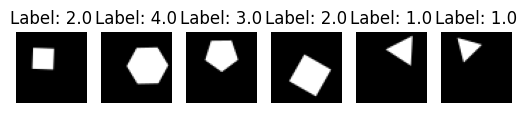

In [5]:
import matplotlib.pyplot as plt
import numpy as np


for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(X[i], cmap='gray')  # Assuming grayscale images
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.show()


In [6]:
unique_labels, label_counts = np.unique(y, return_counts=True)

# Print the results
for label, count in zip(unique_labels, label_counts):
    print(f'Label {label}: {count} ')

Label 0.0: 1381 
Label 1.0: 2853 
Label 2.0: 1868 
Label 3.0: 2137 
Label 4.0: 1761 


In [11]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to add the fourth dimension
X_train = X_train.reshape(X_train.shape[0], 50, 50, 1)
X_val = X_test.reshape(X_test.shape[0], 50, 50, 1)

In [39]:
# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training with data augmentation
history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_val, y_test))

# Save the model to a file
model.save('model1.h5')


Epoch 1/20
500/500 [==============================] - 4s 5ms/step - loss: 1.1815 - accuracy: 0.4925 - val_loss: 0.5910 - val_accuracy: 0.7705
Epoch 2/20
500/500 [==============================] - 2s 5ms/step - loss: 0.5138 - accuracy: 0.8260 - val_loss: 0.2146 - val_accuracy: 0.9595
Epoch 3/20
500/500 [==============================] - 3s 7ms/step - loss: 0.2644 - accuracy: 0.9402 - val_loss: 0.1653 - val_accuracy: 0.9750
Epoch 4/20
500/500 [==============================] - 3s 5ms/step - loss: 0.2079 - accuracy: 0.9609 - val_loss: 0.1671 - val_accuracy: 0.9800
Epoch 5/20
500/500 [==============================] - 2s 5ms/step - loss: 0.1827 - accuracy: 0.9665 - val_loss: 0.1782 - val_accuracy: 0.9645
Epoch 6/20
500/500 [==============================] - 2s 5ms/step - loss: 0.1510 - accuracy: 0.9691 - val_loss: 0.1727 - val_accuracy: 0.9825
Epoch 7/20
500/500 [==============================] - 3s 5ms/step - loss: 0.1313 - accuracy: 0.9745 - val_loss: 0.1484 - val_accuracy: 0.9800
Epoch 

Accuracy ir val_accuracy gan didelis, loss mazeja, bet val_loss nekonverguoja.
Be data augmentation triuku (rotations, scaling, shearing,zooming, filling) :

 Train set accuracy 98.71% Test set (simple) accuracy 98.98% Test set (adv.) accuracy 83.10%

In [37]:
# Reshape the data to add the fourth dimension
X_train = X_train.reshape(X_train.shape[0], 50, 50, 1)
X_val = X_test.reshape(X_test.shape[0], 50, 50, 1)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=23,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)  # Fit the data generator on the training data

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=16), epochs=20, validation_data=(X_val, y_test))

model.save('model.h5')

Epoch 1/20
250/250 [==============================] - 8s 20ms/step - loss: 1.3600 - accuracy: 0.4049 - val_loss: 0.8868 - val_accuracy: 0.5885
Epoch 2/20
250/250 [==============================] - 4s 17ms/step - loss: 0.8436 - accuracy: 0.6661 - val_loss: 0.7961 - val_accuracy: 0.5980
Epoch 3/20
250/250 [==============================] - 5s 21ms/step - loss: 0.4439 - accuracy: 0.8677 - val_loss: 0.2688 - val_accuracy: 0.9435
Epoch 4/20
250/250 [==============================] - 4s 16ms/step - loss: 0.2889 - accuracy: 0.9396 - val_loss: 0.1970 - val_accuracy: 0.9775
Epoch 5/20
250/250 [==============================] - 6s 23ms/step - loss: 0.2529 - accuracy: 0.9494 - val_loss: 0.1518 - val_accuracy: 0.9825
Epoch 6/20
250/250 [==============================] - 4s 17ms/step - loss: 0.2241 - accuracy: 0.9597 - val_loss: 0.2401 - val_accuracy: 0.9370
Epoch 7/20
250/250 [==============================] - 4s 16ms/step - loss: 0.2123 - accuracy: 0.9610 - val_loss: 0.1515 - val_accuracy: 0.9840

Pastebeta, kad su didesniais batch skaiciais accuracy krenta, todel pasirinkta batch=16. Galbut ir kitokios batch ir epoch reiksmiu poras buvo galima pasirinkti, bet tokiu budu modelio efektyvuma siek tiek lengviau tyrineti.

Galima nagrineti hyperparameter optimization/tuning. Naudojausi ImageDataGenerator parametrams nustatyti grid search metoda.

In [40]:
files.download('model1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
from itertools import product
from tqdm import tqdm

# Define the hyperparameter ranges to search
rotation_ranges = [23,26,50]
width_shift_ranges = [0.1, 0.2, 0.3]
height_shift_ranges = [0.1, 0.3, 0.4]

# Initialize a dictionary to store the results
results = {}

# Perform grid search
for rotation_range, width_shift_range, height_shift_range in tqdm(product(rotation_ranges, width_shift_ranges, height_shift_ranges), total=len(rotation_ranges) * len(width_shift_ranges) * len(height_shift_ranges), desc="Grid Search"):
    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    # Model architecture (use your model definition here)

    # Compile the model (use your compile configuration here)

    # Training with data augmentation
    history = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=10, validation_data=(X_val, y_test), verbose=0)

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_val, y_test, verbose=0)

    # Store the results
    results[(rotation_range, width_shift_range, height_shift_range)] = accuracy

# Print the results
for params, accuracy in results.items():
    print(f"Parameters: {params}, Accuracy: {accuracy}")

Grid Search: 100%|██████████| 27/27 [21:43<00:00, 48.29s/it]

Parameters: (23, 0.1, 0.1), Accuracy: 0.9850000143051147
Parameters: (23, 0.1, 0.3), Accuracy: 0.9850000143051147
Parameters: (23, 0.1, 0.4), Accuracy: 0.984499990940094
Parameters: (23, 0.2, 0.1), Accuracy: 0.9850000143051147
Parameters: (23, 0.2, 0.3), Accuracy: 0.9850000143051147
Parameters: (23, 0.2, 0.4), Accuracy: 0.9850000143051147
Parameters: (23, 0.3, 0.1), Accuracy: 0.9850000143051147
Parameters: (23, 0.3, 0.3), Accuracy: 0.9850000143051147
Parameters: (23, 0.3, 0.4), Accuracy: 0.9850000143051147
Parameters: (26, 0.1, 0.1), Accuracy: 0.9850000143051147
Parameters: (26, 0.1, 0.3), Accuracy: 0.9850000143051147
Parameters: (26, 0.1, 0.4), Accuracy: 0.9850000143051147
Parameters: (26, 0.2, 0.1), Accuracy: 0.9850000143051147
Parameters: (26, 0.2, 0.3), Accuracy: 0.984499990940094
Parameters: (26, 0.2, 0.4), Accuracy: 0.9850000143051147
Parameters: (26, 0.3, 0.1), Accuracy: 0.9850000143051147
Parameters: (26, 0.3, 0.3), Accuracy: 0.9850000143051147
Parameters: (26, 0.3, 0.4), Accur

Deja, nera matoma dideliu pakitimu ( galbut simple.data duomenys nera iskraipyti, pvz figuros neliecia ar neiseina uz krastu ir panasiai)
Galima manyti, kad kiti advanced duomenys yra labiau iskraipyti, pastebejau, kad siek tiek itakos tikslumui turi shear_range parametras, kuris leidzia manyti, kad objektai bus istampyti  
shear_range =0.3 :Train set accuracy 98.46% Test set (simple) accuracy 99.92% Test set (adv.) accuracy 95.16%

shear_range=0.4  Test set (adv.) accuracy 94.53%

shear_range=0.25  Test set (adv.) accuracy 94.22%



In [13]:
datagen = ImageDataGenerator(
    rotation_range=23,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)  # Fit the data generator on the training data

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_test))

model.save('model_shear.h5')

Epoch 1/10
250/250 [==============================] - 41s 156ms/step - loss: 1.4105 - accuracy: 0.3789 - val_loss: 1.0781 - val_accuracy: 0.5095
Epoch 2/10
250/250 [==============================] - 44s 175ms/step - loss: 0.9010 - accuracy: 0.6310 - val_loss: 0.4537 - val_accuracy: 0.9030
Epoch 3/10
250/250 [==============================] - 39s 156ms/step - loss: 0.4973 - accuracy: 0.8371 - val_loss: 0.2111 - val_accuracy: 0.9755
Epoch 4/10
250/250 [==============================] - 39s 154ms/step - loss: 0.3350 - accuracy: 0.9179 - val_loss: 0.2131 - val_accuracy: 0.9730
Epoch 5/10
250/250 [==============================] - 40s 161ms/step - loss: 0.2682 - accuracy: 0.9419 - val_loss: 0.1640 - val_accuracy: 0.9825
Epoch 6/10
250/250 [==============================] - 33s 130ms/step - loss: 0.2309 - accuracy: 0.9546 - val_loss: 0.1675 - val_accuracy: 0.9825
Epoch 7/10
250/250 [==============================] - 33s 131ms/step - loss: 0.2241 - accuracy: 0.9578 - val_loss: 0.1731 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visgi sunku nuspeti parametru reiksmes ir reikalaujama daug resursu tikrinti siuos visus hyperparametrus.
Galima buvo bandyti pritaikyti optimizavimo technikas, kaip random search arba  Baysian optimization  visam neurotinklo visiem parametram, bet tokie skaiciavimai uztruktu labai ilgai (su cpu ivertintas modelis uztruko 7min). Jei tikrintume tik 10 skirtingu epoch ir batch reiksmiu, jau turetume 100 iteraciju apie 700min ( ne grid search metodai visgi maziau iteraciju skaiciuotu)

Tuo labiau duomenu bazes skiriasi tai ir parametru reiksmes gali neislikti svarbios arba kaip tik iskilti kaip labai dominuojancios. Taigi, galbut verta butu optimizuot parametrus tik turint adv. duomenu baze.

In [14]:
files.download('model1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>